# REGRESIÓN LINEAL

* Regresión Lineal Simple
* Regresión Lineal Polinómica Simple
* Regresión Lineal Múltiple
* Regresión Comparativa

## 1. Importar Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import model_util as util

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## 2. Cargar datos

In [2]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, delimiter=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


## 3. Regresión Lineal Simple

* Entrada X = ICA 
* Salida y = HUMEDAD
* Separar los datos en entrenamiento y test

In [5]:
X = df[['ICA']]
y = df['HUMEDAD']

# 80% Entrenamiento: X_train, y_train
# 20% Test: X_test, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Entrenammiento {X_train.shape} {y_train.shape}')
print(f'Test {X_test.shape} {y_test.shape}')

Entrenammiento (24688, 1) (24688,)
Test (6172, 1) (6172,)


* EDA entre datos de entrenamiento y datos de prueba

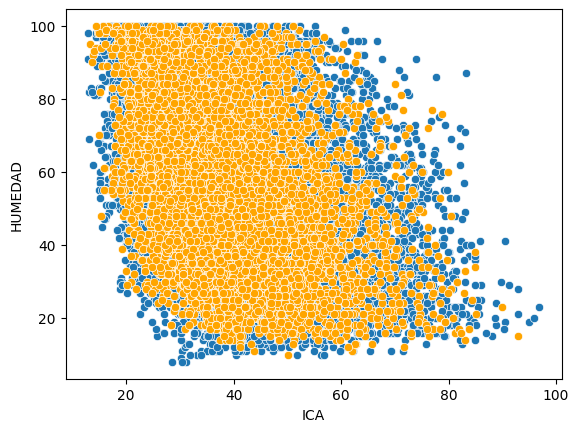

In [6]:
sns.scatterplot(x=X_train['ICA'], y=y_train)
sns.scatterplot(x=X_test['ICA'], y=y_test, c='orange');

Entrenamiento del modelo
* Predicciones

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

* Explorar datos de prueba con predicione

<Axes: xlabel='ICA', ylabel='HUMEDAD'>

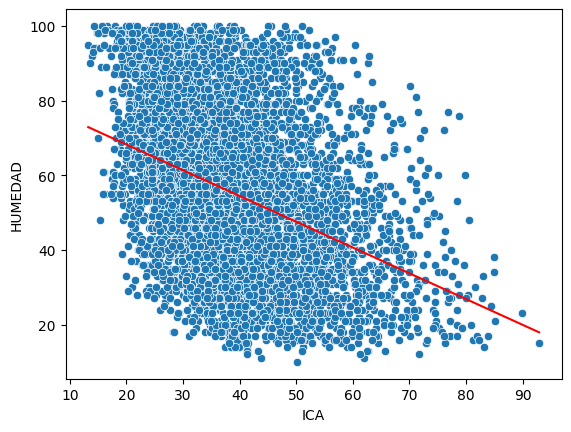

In [8]:
# Test vs prediccion
sns.scatterplot(x=X_test['ICA'], y=y_test) # test
sns.lineplot(x=X_test['ICA'], y=y_pred, c='r') # predicciones

Margen de error: Comprobar en cuánto se equivoca el modelo. 
Cuánto menor sea el error mejor es la predicción

* MAE


In [9]:
mae = mean_absolute_error(y_test, y_pred)
mae

16.86736909597083

* RMSE

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'mse: {mse}')
print(f'rmse {rmse}')

mse: 407.2004696856387
rmse 20.179208846871045
